# Logistic Regression

#### Build logistic regression model to understand the martial affair dataset and also identify the factors affecting the married couples.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import dataset
affair_df = pd.read_csv(r"D:\360digi\DS\Sharath\Logistic_Regression_1\handson\Datasets-Day32-Logistic Regression\Affairs.csv")
affair_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  601 non-null    int64
 1   naffairs    601 non-null    int64
 2   kids        601 non-null    int64
 3   vryunhap    601 non-null    int64
 4   unhap       601 non-null    int64
 5   avgmarr     601 non-null    int64
 6   hapavg      601 non-null    int64
 7   vryhap      601 non-null    int64
 8   antirel     601 non-null    int64
 9   notrel      601 non-null    int64
 10  slghtrel    601 non-null    int64
 11  smerel      601 non-null    int64
 12  vryrel      601 non-null    int64
 13  yrsmarr1    601 non-null    int64
 14  yrsmarr2    601 non-null    int64
 15  yrsmarr3    601 non-null    int64
 16  yrsmarr4    601 non-null    int64
 17  yrsmarr5    601 non-null    int64
 18  yrsmarr6    601 non-null    int64
dtypes: int64(19)
memory usage: 89.3 KB


In [4]:
affair_df.columns

Index(['Unnamed: 0', 'naffairs', 'kids', 'vryunhap', 'unhap', 'avgmarr',
       'hapavg', 'vryhap', 'antirel', 'notrel', 'slghtrel', 'smerel', 'vryrel',
       'yrsmarr1', 'yrsmarr2', 'yrsmarr3', 'yrsmarr4', 'yrsmarr5', 'yrsmarr6'],
      dtype='object')

In [5]:
affair_df.drop('Unnamed: 0', axis = 1, inplace = True)

In [6]:
affair_df.head()

,naffairs,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6
0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,3,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
4,3,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0


In [7]:
affair_df['naffairs'].unique()

array([ 0,  3,  7, 12,  1,  2], dtype=int64)

In [8]:
affair_df["y"] = np.zeros(601)

In [9]:
affair_df.head()

,naffairs,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6,y
0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0.0
1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0.0
2,3,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0.0
3,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0.0
4,3,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0.0


In [10]:
# Binarize the 'naffairs' column data
affair_df.loc[affair_df['naffairs'] > 0,  "y"] = 1

In [11]:
affair_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   naffairs  601 non-null    int64  
 1   kids      601 non-null    int64  
 2   vryunhap  601 non-null    int64  
 3   unhap     601 non-null    int64  
 4   avgmarr   601 non-null    int64  
 5   hapavg    601 non-null    int64  
 6   vryhap    601 non-null    int64  
 7   antirel   601 non-null    int64  
 8   notrel    601 non-null    int64  
 9   slghtrel  601 non-null    int64  
 10  smerel    601 non-null    int64  
 11  vryrel    601 non-null    int64  
 12  yrsmarr1  601 non-null    int64  
 13  yrsmarr2  601 non-null    int64  
 14  yrsmarr3  601 non-null    int64  
 15  yrsmarr4  601 non-null    int64  
 16  yrsmarr5  601 non-null    int64  
 17  yrsmarr6  601 non-null    int64  
 18  y         601 non-null    float64
dtypes: float64(1), int64(18)
memory usage: 89.3 KB


In [14]:
# change the datatype 
affair_df = pd.DataFrame(affair_df.astype(int))

In [15]:
affair_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   naffairs  601 non-null    int32
 1   kids      601 non-null    int32
 2   vryunhap  601 non-null    int32
 3   unhap     601 non-null    int32
 4   avgmarr   601 non-null    int32
 5   hapavg    601 non-null    int32
 6   vryhap    601 non-null    int32
 7   antirel   601 non-null    int32
 8   notrel    601 non-null    int32
 9   slghtrel  601 non-null    int32
 10  smerel    601 non-null    int32
 11  vryrel    601 non-null    int32
 12  yrsmarr1  601 non-null    int32
 13  yrsmarr2  601 non-null    int32
 14  yrsmarr3  601 non-null    int32
 15  yrsmarr4  601 non-null    int32
 16  yrsmarr5  601 non-null    int32
 17  yrsmarr6  601 non-null    int32
 18  y         601 non-null    int32
dtypes: int32(19)
memory usage: 44.7 KB


### Data Preprocessing

In [16]:
affair_df.isna().sum()

naffairs    0
kids        0
vryunhap    0
unhap       0
avgmarr     0
hapavg      0
vryhap      0
antirel     0
notrel      0
slghtrel    0
smerel      0
vryrel      0
yrsmarr1    0
yrsmarr2    0
yrsmarr3    0
yrsmarr4    0
yrsmarr5    0
yrsmarr6    0
y           0
dtype: int64

In [17]:
affair_df.isnull().sum()

naffairs    0
kids        0
vryunhap    0
unhap       0
avgmarr     0
hapavg      0
vryhap      0
antirel     0
notrel      0
slghtrel    0
smerel      0
vryrel      0
yrsmarr1    0
yrsmarr2    0
yrsmarr3    0
yrsmarr4    0
yrsmarr5    0
yrsmarr6    0
y           0
dtype: int64

In [18]:
# Seperating input and output variables 
X = pd.DataFrame(affair_df.iloc[:, 1:18])
Y = pd.DataFrame(affair_df.iloc[:, 18])

In [19]:
X.describe()

,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,0.715474,0.026622,0.109817,0.154742,0.322795,0.386023,0.079867,0.272879,0.214642,0.316140,0.116473,0.086522,0.146423,0.174709,0.136439,0.116473,0.339434
std,0.451564,0.161111,0.312922,0.361960,0.467935,0.487242,0.271313,0.445810,0.410916,0.465355,0.321058,0.281368,0.353824,0.380034,0.343540,0.321058,0.473912
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


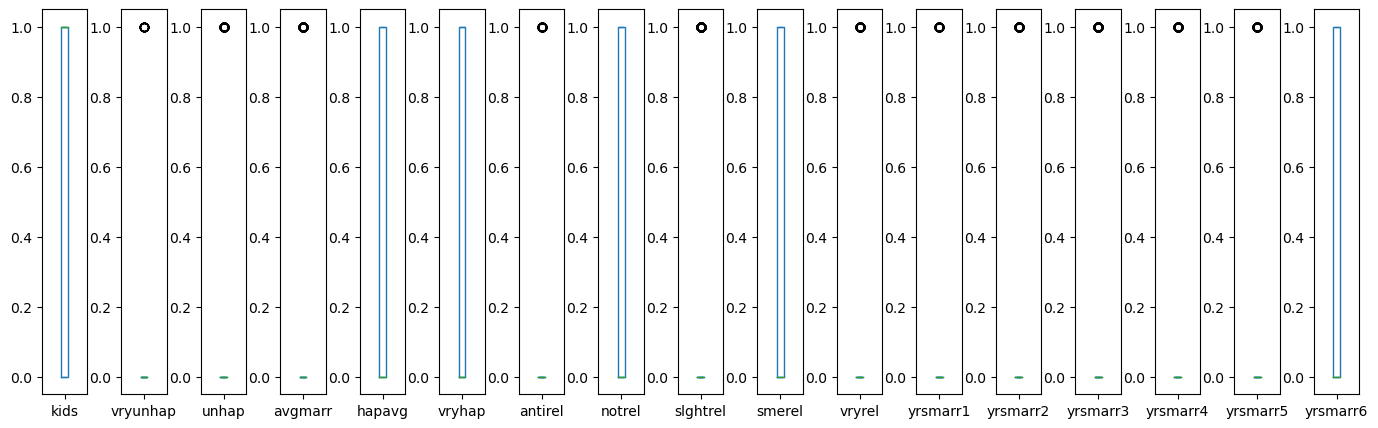

In [20]:
# box plot visualisation
X.plot(kind = 'box', subplots = True, sharey = False, figsize = (17,5))
plt.subplots_adjust(wspace = 0.75)
plt.show()
#Most of the columns have binary data as 0 or 1, its not outliers

In [21]:
numeric_features = X.select_dtypes(exclude = ['object']).columns
numeric_features

Index(['kids', 'vryunhap', 'unhap', 'avgmarr', 'hapavg', 'vryhap', 'antirel',
       'notrel', 'slghtrel', 'smerel', 'vryrel', 'yrsmarr1', 'yrsmarr2',
       'yrsmarr3', 'yrsmarr4', 'yrsmarr5', 'yrsmarr6'],
      dtype='object')

In [22]:
## Scaling with MinMaxScaler
scale_pipeline = Pipeline([('scale', MinMaxScaler())])

scale_columntransfer = ColumnTransformer([('scale', scale_pipeline, numeric_features)]) # Skips the transformations for remaining columns

scale = scale_columntransfer.fit(X)


In [23]:
scaled_data = pd.DataFrame(scale.transform(X), columns = numeric_features)
scaled_data.describe()

,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,0.715474,0.026622,0.109817,0.154742,0.322795,0.386023,0.079867,0.272879,0.214642,0.316140,0.116473,0.086522,0.146423,0.174709,0.136439,0.116473,0.339434
std,0.451564,0.161111,0.312922,0.361960,0.467935,0.487242,0.271313,0.445810,0.410916,0.465355,0.321058,0.281368,0.353824,0.380034,0.343540,0.321058,0.473912
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y       601 non-null    int32
dtypes: int32(1)
memory usage: 2.5 KB


# Logistic Regression

In [25]:
logit_model = sm.Logit(Y, scaled_data ).fit()

Optimization terminated successfully.
         Current function value: 0.501009
         Iterations 7


In [26]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  601
Model:                          Logit   Df Residuals:                      586
Method:                           MLE   Df Model:                           14
Date:                Tue, 21 Mar 2023   Pseudo R-squ.:                  0.1083
Time:                        22:55:43   Log-Likelihood:                -301.11
converged:                       True   LL-Null:                       -337.69
Covariance Type:            nonrobust   LLR p-value:                 5.129e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
kids           0.1727      0.311      0.556      0.579      -0.437       0.782
vryunhap       0.2951        nan        nan        nan         nan         nan
unhap          0.4007        nan        nan        nan         nan         nan
avgmarr       -0.4358        nan        nan        nan         nan         nan
hapavg        -0.7443        nan        nan        nan         nan         nan
vryhap        -1.2228        nan        nan        nan         nan         nan
antirel        0.5636        nan        nan        nan         nan         nan
notrel        -0.4231        nan        nan        nan         nan         nan
slghtrel      -0.0331        nan        nan        nan         nan         nan
smerel        -0.9556        nan        nan        nan         nan         nan
vryrel        -0.8587        nan        nan        nan         nan         nan
yrsmarr1      -1.0395        nan        nan        nan         nan         nan
yrsmarr2      -0.7424        nan        nan        nan         nan         nan
yrsmarr3      -0.1181        nan        nan        nan         nan         nan
yrsmarr4      -0.0925        nan        nan        nan         nan         nan
yrsmarr5       0.2272        nan        nan        nan         nan         nan
yrsmarr6       0.0583        nan        nan        nan         nan         nan
==============================================================================
"""

In [27]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.108     
Dependent Variable: y                AIC:              632.2126  
Date:               2023-03-21 22:55 BIC:              698.1915  
No. Observations:   601              Log-Likelihood:   -301.11   
Df Model:           14               LL-Null:          -337.69   
Df Residuals:       586              LLR p-value:      5.1293e-10
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-------------------------------------------------------------------
             Coef.    Std.Err.     z      P>|z|     [0.025   0.975]
-------------------------------------------------------------------
kids         0.1727     0.3110   0.5555   0.5785   -0.4367   0.7822
vryunhap     0.2951        nan      nan      nan       nan      nan
unhap        0.4007        nan      nan      nan       nan      nan
avgmarr     -0.4358        nan      nan      nan       nan      nan
hapavg      -0.7443        nan      nan      nan       nan      nan
vryhap      -1.2228        nan      nan      nan       nan      nan
antirel      0.5636        nan      nan      nan       nan      nan
notrel      -0.4231        nan      nan      nan       nan      nan
slghtrel    -0.0331        nan      nan      nan       nan      nan
smerel      -0.9556        nan      nan      nan       nan      nan
vryrel      -0.8587        nan      nan      nan       nan      nan
yrsmarr1    -1.0395        nan      nan      nan       nan      nan
yrsmarr2    -0.7424        nan      nan      nan       nan      nan
yrsmarr3    -0.1181        nan      nan      nan       nan      nan
yrsmarr4    -0.0925        nan      nan      nan       nan      nan
yrsmarr5     0.2272        nan      nan      nan       nan      nan
yrsmarr6     0.0583        nan      nan      nan       nan      nan
=================================================================

"""

In [ ]:
# AIC: 632.2126

In [28]:
# Prediction
pred = logit_model.predict(scaled_data)
pred  # Probabilities

0      0.365805
1      0.139673
2      0.179485
3      0.512577
4      0.231248
         ...   
596    0.162239
597    0.264067
598    0.593288
599    0.366694
600    0.247362
Length: 601, dtype: float64

In [29]:
# ROC Curve to identify the appropriate cutoff value
fpr, tpr, thresholds = roc_curve(Y.y, pred)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.2521571570135329

In [30]:
auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve : %f" % auc)

Area under the ROC curve : 0.720791


In [31]:
# Filling all the cells with zeroes
scaled_data["pred"] = np.zeros(601)

In [32]:
# taking threshold value and above the prob value will be treated as correct value 
scaled_data.loc[pred > optimal_threshold, "pred"] = 1

In [33]:
# Confusion Matrix
confusion_matrix(scaled_data.pred, Y.y)

array([[318,  52],
       [133,  98]], dtype=int64)

In [34]:
# Accuracy score of the model
print('Test accuracy = ', accuracy_score(scaled_data.pred, Y.y))

Test accuracy =  0.6921797004991681


In [35]:
# Classification report
classification = classification_report(scaled_data["pred"], Y)
print(classification)

              precision    recall  f1-score   support

         0.0       0.71      0.86      0.77       370
         1.0       0.65      0.42      0.51       231

    accuracy                           0.69       601
   macro avg       0.68      0.64      0.64       601
weighted avg       0.69      0.69      0.67       601



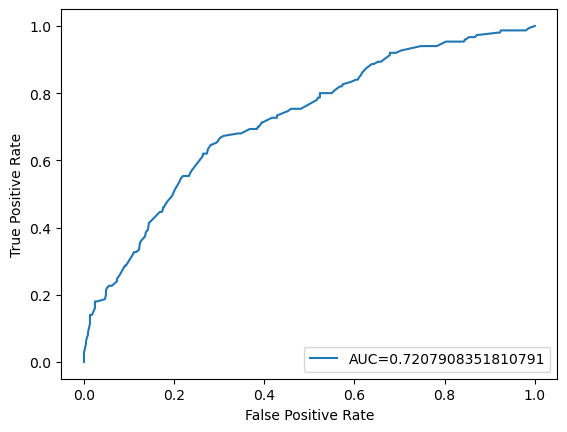

In [36]:
### PLOT FOR ROC
plt.plot(fpr, tpr, label = "AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 4)
plt.show()

In [37]:
# Model evaluation - Data Split
x_train, x_test, y_train, y_test = train_test_split (scaled_data.iloc[:, :17], Y, 
                                                     test_size = 0.2, 
                                                     random_state = 0,
                                                     stratify = Y)

In [38]:
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   kids      601 non-null    float64
 1   vryunhap  601 non-null    float64
 2   unhap     601 non-null    float64
 3   avgmarr   601 non-null    float64
 4   hapavg    601 non-null    float64
 5   vryhap    601 non-null    float64
 6   antirel   601 non-null    float64
 7   notrel    601 non-null    float64
 8   slghtrel  601 non-null    float64
 9   smerel    601 non-null    float64
 10  vryrel    601 non-null    float64
 11  yrsmarr1  601 non-null    float64
 12  yrsmarr2  601 non-null    float64
 13  yrsmarr3  601 non-null    float64
 14  yrsmarr4  601 non-null    float64
 15  yrsmarr5  601 non-null    float64
 16  yrsmarr6  601 non-null    float64
 17  pred      601 non-null    float64
dtypes: float64(18)
memory usage: 84.6 KB


In [39]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 55 to 279
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y       480 non-null    int32
dtypes: int32(1)
memory usage: 5.6 KB


In [40]:
y_train

,y
55,1
160,0
340,0
269,0
183,1
...,...
306,0
8,1
90,0
266,0


In [41]:
# Fitting Logistic Regression to the training set  
logisticmodel = sm.Logit(y_train, x_train).fit()

Optimization terminated successfully.
         Current function value: 0.502405
         Iterations 6


In [42]:
# Evaluate on train data
y_pred_train = logisticmodel.predict(x_train)  
y_pred_train

55     0.210742
160    0.046816
340    0.183993
269    0.178153
183    0.141925
         ...   
306    0.412118
8      0.424447
90     0.081118
266    0.457205
279    0.238161
Length: 480, dtype: float64

In [43]:
# Metrics
# Filling all the cells with zeroes
y_train["pred"] = np.zeros(480)

In [44]:
# taking threshold value and above the prob value will be treated as correct value 
y_train.loc[pred > optimal_threshold, "pred"] = 1

In [45]:
auc = metrics.roc_auc_score(y_train["y"], y_pred_train)
print("Area under the ROC curve : %f" % auc)


Area under the ROC curve : 0.723843


In [46]:
classification_train = classification_report(y_train["pred"], y_train["y"])
print(classification_train)

              precision    recall  f1-score   support

         0.0       0.71      0.86      0.78       297
         1.0       0.66      0.43      0.52       183

    accuracy                           0.70       480
   macro avg       0.68      0.65      0.65       480
weighted avg       0.69      0.70      0.68       480



In [47]:
# confusion matrix 
confusion_matrix(y_train["pred"], y_train["y"])

array([[256,  41],
       [104,  79]], dtype=int64)

In [48]:
# Accuracy score of the model
print('Train accuracy = ', accuracy_score(y_train["pred"], y_train["y"]))

Train accuracy =  0.6979166666666666


In [49]:
# Validate on Test data
y_pred_test = logisticmodel.predict(x_test)  
y_pred_test


422    0.306846
415    0.192792
524    0.183993
391    0.083439
131    0.315871
         ...   
424    0.083439
580    0.194895
372    0.210266
274    0.600919
479    0.141925
Length: 121, dtype: float64

In [50]:
# Filling all the cells with zeroes
y_test["y_pred_test"] = np.zeros(121)

In [51]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 422 to 479
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   y            121 non-null    int32  
 1   y_pred_test  121 non-null    float64
dtypes: float64(1), int32(1)
memory usage: 2.4 KB


In [52]:
# Capturing the prediction binary values
y_test.loc[y_pred_test > optimal_threshold, "y_pred_test"] = 1

In [53]:
# classification report
classification1 = classification_report(y_test["y_pred_test"], y_test["y"])
print(classification1)

              precision    recall  f1-score   support

         0.0       0.64      0.84      0.72        69
         1.0       0.63      0.37      0.46        52

    accuracy                           0.64       121
   macro avg       0.64      0.60      0.59       121
weighted avg       0.64      0.64      0.61       121



In [54]:
# confusion matrix 
confusion_matrix(y_test["y_pred_test"], y_test["y"])

array([[58, 11],
       [33, 19]], dtype=int64)

In [55]:
# Accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test["y_pred_test"], y_test["y"]))


Test accuracy =  0.6363636363636364
